# PROYECTO EDA

El presente documento tiene como objeto el desarrollo de un proyecto EDA donde se analizarán los datos recogidos sobre películas de todos los tiempos, teniendo como hipótesis de partida que las valoraciones de las diferentes páginas web recogidas tienen repercusión en la recaudación de las mismas. Se analizarán esas notas según las variables de género, edad o procedencia para comprobar que la muestra es representativa de cara a justificar la validez de la conclusión.

Se detalla a continuación la procedencia y características de los datos utilizados. 

## PROCEDENCIA DE LOS DATOS
Para el proyecto se han usado cuatro Dataframe procedentes de Kaagle:

- final_data(movies 1950-2020).csv, con información general de las películas como director, actores, género o título. Tiene también una columna de valoraciones de TMDb. 

- IMDb movies y ratings, del que se sacará un único dataset sobre IMDb, donde se recogen además de las valoraciones medias por películas, esas mismas valoraciones según género, edad, o procedencia. Es necesario unir las dos para poder tener una columna común entre las tres tablas que sea el título de la película.

- TMDb_updated, con más detalle de las valoraciones de TMDb y además las críticas de Metacritic como tercera fuente de estudio. 

Estos dataframe proceden del scraping de las respectivas páginas web efectuado por los siguientes usuarios, contenidos en los siguientes datasets:
* IMDB:
    * Usuario: https://www.kaggle.com/stefanoleone992. 
    * Dataset: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+ratings.csv
* Data movies: 
    * Usuario : https://www.kaggle.com/udaychandra 
    * Dataset : https://www.kaggle.com/udaychandra/hollywood-movies19502020
* TMDb: 
    * Usuario : https://www.kaggle.com/sankha1998
    * Dataset : https://www.kaggle.com/sankha1998/tmdb-top-10000-popular-movies-dataset


## IMPORTACIÓN DE LAS LIBRERÍAS
Lo primero que se hace es importar las diferentes librerías que se van a utilizar, tanto de python como externas, así como los módulos desarrolados para este proyecto. 

In [1]:
import numpy as np
import pandas as pd 
import os, sys
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
ruta = os.path.dirname(os.getcwd())
sys.path.append(ruta)
import scr.utils.folders_tb as folders
from scr.utils.visualization_tb import Plotter
from scr.utils.calculadora_estadistica import Calculadora_estadistica
from scr.utils.mining_data_tb import Organizador_dataframe
from scr.utils.conversor import Conversor

In [3]:
gestor = folders.Gestor_archivos()
organizador = Organizador_dataframe()
conversor = Conversor()
plotter = Plotter()

## CARGA DE LOS DATAFRAME ORIGINALES

Se cargan los cuatro dataframe en sus variablaes correspondientes


In [4]:
films = gestor.cargar_df(ruta + os.sep + 'data' + os.sep + 'final_data(movies 1950-2020).csv')
imdb_ratings = gestor.cargar_df(ruta + os.sep + 'data' + os.sep + 'IMDb_ratings.csv')
imdb_movies = gestor.cargar_df(ruta + os.sep + 'data' + os.sep + 'IMDb_movies.csv')
tmdb = gestor.cargar_df(ruta + os.sep + 'data' + os.sep + 'TMDb_updated.csv')

/Users/juanbayonfernandez/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# UNIÓN DE LOS DATAFRAME





Se unen primero los dos dataframe de imdb y posteriormente se pasan los tres restantes por el método de cambios previos que renombra la columna con el nombre de las películas a 'film' y pasa todos los títulos a minúsculas para poder combinarlos posteriormente y obtener el daframe de proyecto. 

In [5]:
imdb = organizador.union_dataframe(imdb_movies, imdb_ratings)
organizador.cambios_previos(imdb, 'title')
organizador.cambios_previos(tmdb, 'title')
organizador.cambios_previos(films, 'movie_title')

In [6]:
intermedio = organizador.union_dataframe(films, tmdb)

In [7]:
eda = organizador.union_dataframe(intermedio, imdb)

### RESULTADO 

Este es el dataframe de trabajo para empezar a limpiarlo

In [8]:
eda.head(2)

director_name      actor_1_name actor_2_name   actor_3_name  \
0   Babak Najafi  Taraji P. Henson  Billy Brown   Danny Glover   
1  Brett Donowho      Bruce Willis  Cole Hauser  Shawn Ashmore   

                  genres              film  tmdb_ratings  Unnamed: 0  \
0  Thriller Action Crime        proud mary           5.5        7451   
1                 Action  acts of violence           5.8        7070   

                                            overview original_language  ...  \
0  Mary is a hit woman working for an organized c...                en  ...   
1  When his fiancee is kidnapped by human traffic...                en  ...   

   females_30age_avg_vote  females_30age_votes females_45age_avg_vote  \
0                     5.2                619.0                    5.7   
1                     5.5                410.0                    5.7   

  females_45age_votes top1000_voters_rating top1000_voters_votes  \
0               369.0                   4.5                193.0   
1               284.0                   4.5                151.0   

  us_voters_rating  us_voters_votes non_us_voters_rating non_us_voters_votes  
0              5.1           1937.0                  4.8              2751.0  
1              5.6           1533.0                  5.1              4242.0  

[2 rows x 81 columns]

# LIMPIEZA DE LOS DATOS

  

Como primer paso se eliminarán las columnas con datos duplicados entre ellas y las que no interesan para el proyecto. Se renombra una de ellas para que queden claros los datos que contiene.

In [9]:
columnas_duplicadas = ['Unnamed: 0', 'overview', 'imdb_title_id', 'original_title', 'date_published', 'genre', 'duration', 'language', 'director', 'writer', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'description']
columnas_no_interesantes = ['allgenders_0age_votes', 'allgenders_18age_votes', 'allgenders_30age_votes', 'allgenders_45age_votes', 'males_0age_votes', 'males_allages_votes', 'males_18age_votes', 'males_30age_votes', 'males_45age_votes', 'females_allages_votes', 'females_0age_votes', 'females_18age_votes', 'females_30age_votes', 'females_45age_votes', 'top1000_voters_votes', 'top1000_voters_rating', 'us_voters_votes', 'non_us_voters_votes', 'vote_average', 'votes', 'avg_vote', 'production_company', 'weighted_average_vote', 'median_vote', 'reviews_from_users', 'reviews_from_critics', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1']

In [10]:
organizador.eliminar_columnas(eda, (columnas_duplicadas + columnas_no_interesantes))

In [11]:
cambios={'vote_count': 'tmdb_vote_count', 'mean_vote': 'imdb_ratings'}
organizador.renombra_columnas(eda, cambios)


## REVISIÓN DE LOS TIPOS DE LAS COLUMNAS


 


Observando los tipos de las columnas hay varias columnas númericas con formato object. Además las columna de recacudación y presupuesto están en varias divisas, con el nombre de la divisa al principio de la cadena, del tipo $ 20877013. Se pasa esta columna por un convesor de divisa para dejarla en euros con un tipo númerico. 


La columna año tiene dos valores extraños (que se han comprobado con la función del conversor comprueba valores raros) con la siguiente entrada "TV Movie 2019". Se sustituyen por el año únicamente y luego se convierte la columna a entero. 

La columna director asimismo tiene tres valores múltiples que no corresponden. Se retiran esos valores. 

In [12]:
conversor.conversion_columna(eda, 'worlwide_gross_income')
conversor.conversion_columna(eda, 'usa_gross_income')
conversor.conversion_columna(eda, 'budget')

In [13]:
organizador.sustitucion_valor_raro(eda, 'TV Movie 2019', '2019')

In [14]:
eda = organizador.elimina_valores_longitud(eda, 'director_name', 40)

In [15]:
conversor.columna_a_entero(eda, 'year')

## GESTIÓN DE LOS VALORES NaN

Observando la distribución de los valores nulos se comprueba que dos de las colunnas determinantes para el estudio, que son los ingresos totales tanto americanos como mundiales, tienen bastantes valores NaN. Para este caso rellenarlos podría enmascarar el resultado, de forma que se eliminan esos valores. 

Para el resto de valores nulos se estudia cuál es el valor de relleno más significativo. 


In [16]:
columnas = ['worlwide_gross_income', 'usa_gross_income']
eda = organizador.eliminar_nan_columnas(eda, columnas)

In [17]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 2653
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              1697 non-null   object 
 1   genres                     1697 non-null   object 
 2   film                       1697 non-null   object 
 3   tmdb_ratings               1690 non-null   float64
 4   original_language          1697 non-null   object 
 5   tmdb_vote_count            1697 non-null   int64  
 6   year                       1697 non-null   int64  
 7   country                    1697 non-null   object 
 8   actors                     1697 non-null   object 
 9   budget                     1549 non-null   float64
 10  usa_gross_income           1697 non-null   float64
 11  worlwide_gross_income      1697 non-null   float64
 12  metascore                  1625 non-null   float64
 13  total_votes                1697 non-null   int64

In [18]:
eda.describe()

tmdb_ratings  tmdb_vote_count         year        budget  \
count   1690.000000      1697.000000  1697.000000  1.549000e+03   
mean       6.538698      2147.981732  2006.631114  3.776945e+07   
std        0.810452      3049.924705     9.936208  4.287827e+07   
min        2.800000         0.000000  1959.000000  5.740000e+03   
25%        6.000000       386.000000  2002.000000  9.020000e+06   
50%        6.600000      1007.000000  2008.000000  2.132000e+07   
75%        7.100000      2629.000000  2014.000000  4.920000e+07   
max        9.500000     25148.000000  2020.000000  2.919200e+08   

       usa_gross_income  worlwide_gross_income    metascore   total_votes  \
count      1.697000e+03           1.697000e+03  1625.000000  1.697000e+03   
mean       4.788949e+07           1.109407e+08    56.980308  1.488541e+05   
std        7.308959e+07           1.993240e+08    16.973454  2.066078e+05   
min        1.106000e+03           1.484000e+03     9.000000  1.410000e+02   
25%        4.164501e+06           9.975313e+06    44.000000  3.081500e+04   
50%        2.251688e+07           4.129971e+07    57.000000  7.585900e+04   
75%        5.762217e+07           1.161049e+08    69.000000  1.891790e+05   
max        7.038659e+08           2.294196e+09   100.000000  2.002816e+06   

       imdb_ratings  allgenders_0age_avg_vote  ...  males_18age_avg_vote  \
count   1697.000000               1629.000000  ...           1697.000000   
mean       6.639599                  6.525844  ...              6.545846   
std        0.934771                  1.213079  ...              1.050616   
min        2.500000                  1.300000  ...              2.000000   
25%        6.100000                  5.800000  ...              5.900000   
50%        6.700000                  6.700000  ...              6.600000   
75%        7.300000                  7.400000  ...              7.300000   
max        8.700000                 10.000000  ...             10.000000   

       males_30age_avg_vote  males_45age_avg_vote  females_allages_avg_vote  \
count           1697.000000           1697.000000               1697.000000   
mean               6.405952              6.377725                  6.604950   
std                1.022561              0.958385                  0.928581   
min                1.800000              2.000000                  2.200000   
25%                5.800000              5.800000                  6.000000   
50%                6.500000              6.400000                  6.700000   
75%                7.100000              7.000000                  7.300000   
max                9.000000              8.800000                  9.000000   

       females_0age_avg_vote  females_18age_avg_vote  females_30age_avg_vote  \
count            1496.000000             1694.000000             1697.000000   
mean                6.668850                6.690437                6.524750   
std                 1.418782                0.933167                0.956378   
min                 1.000000                1.800000                2.000000   
25%                 6.000000                6.100000                6.000000   
50%                 7.000000                6.800000                6.600000   
75%                 7.600000                7.300000                7.200000   
max                10.000000               10.000000                8.900000   

       females_45age_avg_vote  us_voters_rating  non_us_voters_rating  
count             1697.000000       1697.000000           1697.000000  
mean                 6.614850          6.522334              6.422334  
std                  0.923994          1.023827              0.992989  
min                  2.100000          1.600000              1.900000  
25%                  6.000000          5.900000              5.800000  
50%                  6.700000          6.600000              6.500000  
75%                  7.200000          7.200000              7.100000  
max            

In [19]:
pd.DataFrame(eda.median()).T

tmdb_ratings  tmdb_vote_count    year      budget  usa_gross_income  \
0           6.6           1007.0  2008.0  21320000.0        22516884.0   

   worlwide_gross_income  metascore  total_votes  imdb_ratings  \
0             41299708.0       57.0      75859.0           6.7   

   allgenders_0age_avg_vote  ...  males_18age_avg_vote  males_30age_avg_vote  \
0                       6.7  ...                   6.6                   6.5   

   males_45age_avg_vote  females_allages_avg_vote  females_0age_avg_vote  \
0                   6.4                       6.7                    7.0   

   females_18age_avg_vote  females_30age_avg_vote  females_45age_avg_vote  \
0                     6.8                     6.6                     6.7   

   us_voters_rating  non_us_voters_rating  
0               6.6                   6.5  

[1 rows x 25 columns]

Los valores que quedan por rellenar en su mayoría son de valoraciones en las diferentes columnas. Se comprueba que la muestra está muy centrada, ya que la media y la mediana son prácticamente iguales. **La media es por tanto un valor significativo en esta muestra para los valores de las valoraciones.**

Es también asimétrica hacia la derecha dados los valores de los dos cuartiles. 

Se utilizarán entonces para las columnas de votaciones la media como valor de sustitución de los NaN.

Para el presupuesto la media y la mediana difieren mucho. Se estudia este caso para comprobar cómo se distribuye. 

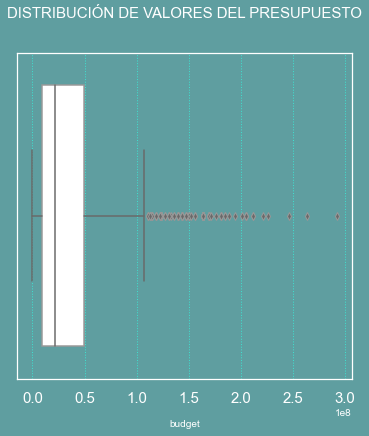

In [20]:
plotter.set_theme('a')
fig, ax = plotter.default_values(title='DISTRIBUCIÓN DE VALORES DEL PRESUPUESTO')
plotter.visualizar(kind='box', x='budget', df=eda, ax=ax)
plotter.guardar_figura(fig, 'boxplot_presupuesto', ruta)

La distribución está muy desplazada a la derecha y la media se ve muy afectada. Si se usa la media como valor de relleno se desplazará la caja, por lo que en este caso se usará la mediana. 

Se procece al tratamiento de los datos con los valores de relleno elegidos. 

In [21]:
organizador.rellena_nan(eda, columna='budget', median=True)
organizador.rellena_nan(eda, todo=True, mean=True)

## FORMATO DE LAS COLUMNAS CON MÚLTIPLES VALORES

Las columnas de Género, País y Actores poseen entradas con diferentes valores, separados por comas. Se les va a dar formato con el separador "|" que permite trabajar con ellos con los métodos de los strings.

In [22]:
organizador.convierte_dummies(eda, columna='genres', sep=' ')
organizador.convierte_dummies(eda, columna='country', sep=', ')
organizador.convierte_dummies(eda, columna='actors', sep=', ')

## ESTUDIO DE LOS VALORES REPETIDOS

In [23]:
organizador.valores_repetidos(eda, estudio=True)

El dataframe tiene 93 entradas repetidas


Hay varias entradas completas con valores repetidos, de forma que se eliminan del dataframe. 

In [24]:
eda = organizador.valores_repetidos(eda, elimina=True)

La columna film es la que debe tener valores únicos, compruebo también esa columna. 

In [25]:
organizador.valores_repetidos(eda, estudio=True, columna='film')

El dataframe tiene 245 entradas repetidas en la columna film


Esas entradas referentes a la misma película son datos repetidos. Se hace un estudio y se comprueba que los dataframe originales venían con entradas repetidas, por lo que se toma la decisión de eliminar las 338 entradas. 

In [26]:
eda = organizador.valores_repetidos(eda, elimina=True, columna='film')

## ESTUDIO DE LOS OUTLIERS

Se revisan los valores que pueden ser outliers de la muestra para poder decidir qué hacer con ellos. En el caso de las columnas con valoraciones, aunque las notas tienen una distribución normal  centrada en las notas medias altas, las notas bajas también son sifnificativas para el estudio, por lo que se mantienen en el dataset. 

Se muestra como ejemplo de lo comentado la distribución de valoraciones de la página TMDb, ya que el resto de valoraciones tanto de IMDb como de Metacritic tienen distribuciones similares. 

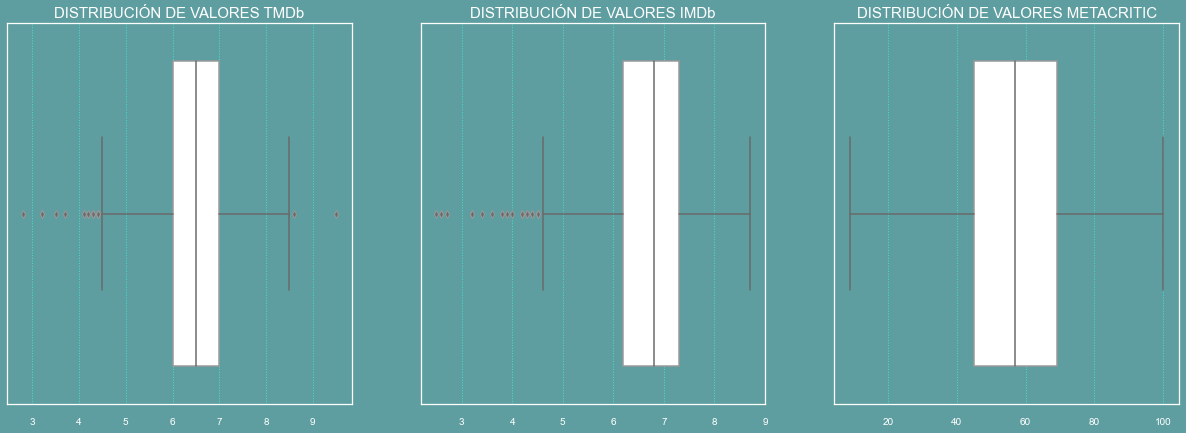

In [27]:
titulos = ['DISTRIBUCIÓN DE VALORES TMDb', 'DISTRIBUCIÓN DE VALORES IMDb', 'DISTRIBUCIÓN DE VALORES METACRITIC']
xlabels = [None] * 3
ylabels = [None] * 3
valoresx = ['tmdb_ratings', 'imdb_ratings', 'metascore']
tipos = ['box'] * 3

fig, ax = plotter.subplots(1, 3, titulos)
plotter.visualizacion_multiple(tipos=tipos, ax=ax, df=eda, valoresx=valoresx, xlabels=xlabels, ylabels=ylabels)
plotter.guardar_figura(fig, 'boxplot_valoraciones_3fuentes', ruta)

Las valoraciones de metacritic son valoraciones que aglutinan el resto de páginas haciendo una agregación ponderada, por lo que la muestra es más simétrica y centrada. La de IMDB tienen una tendencia clara a la derecha, por lo que determina como valores extremos los bajos. En cualquiera de los tres casos los valores extremos son importantes para la muestra para poder estudiar si existe relación entre las notas y las recaudaciones. 

Una vez tomada una decisión sobre las columnas con valoraciones observo los outliers tanto en el presupuesto como en las recaudaciones, tres de las columnas principales del estudio. 

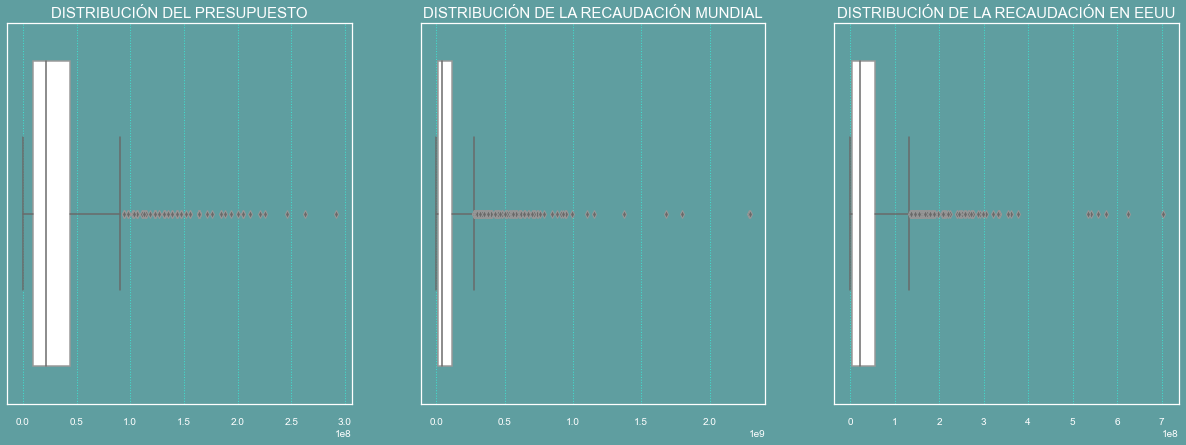

In [28]:
titulos = ['DISTRIBUCIÓN DEL PRESUPUESTO', 'DISTRIBUCIÓN DE LA RECAUDACIÓN MUNDIAL', 'DISTRIBUCIÓN DE LA RECAUDACIÓN EN EEUU']
xlabels = [None] * 3
ylabels = [None] * 3
valoresx = ['budget', 'worlwide_gross_income', 'usa_gross_income']
tipos = ['box'] * 3

fig, ax = plotter.subplots(1, 3, titulos)
plotter.visualizacion_multiple(tipos=tipos, ax=ax, df=eda, valoresx=valoresx, xlabels=xlabels, ylabels=ylabels)
plotter.guardar_figura(fig, 'boxplot_presupuesto_recaudaciones', ruta)

Los valores están en un rango compacto, excepto una serie de valores que se escapan del grupo. Estudio de todas formas los outliers con la instancia de la calculadora estadística. 

In [29]:
calculadora = Calculadora_estadistica(eda)

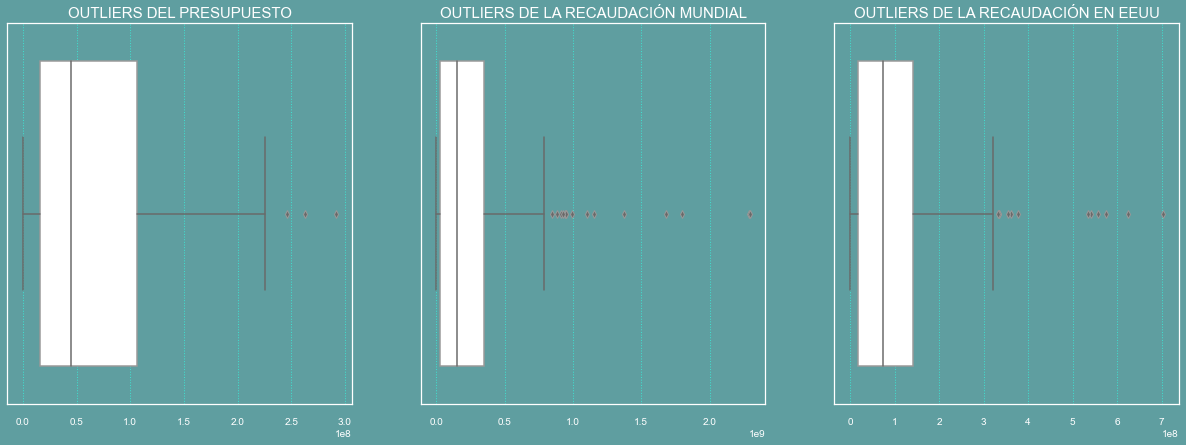

In [30]:
titulos = ['OUTLIERS DEL PRESUPUESTO', 'OUTLIERS DE LA RECAUDACIÓN MUNDIAL', 'OUTLIERS DE LA RECAUDACIÓN EN EEUU']
xlabels = [None] * 3
ylabels = [None] * 3
valoresx = ['budget', 'worlwide_gross_income', 'usa_gross_income']
tipos = ['box'] * 3

fig, ax = plotter.subplots(1, 3, titulos)
plotter.visualizacion_multiple(tipos=tipos, ax=ax, df=calculadora.outliers, valoresx=valoresx, xlabels=xlabels, ylabels=ylabels)
plotter.guardar_figura(fig, 'boxplot_outliers', ruta)

Los outlieres forman un grupo compacto y por tanto significativo. En este caso y para estas tres variables se considera importante mantener los valores extremos, porque tanto las valoraciones mínimas como las máximas deben tener su representación para comprobar si existe relación con las votaciones. 

Se mantiene por tanto el dataset al no considerar que la muestra tenga outliers para el próposito del estudio.

In [31]:
gestor.guardar_csv(eda, ruta, 'EDA_analisis.csv')

## ANÁLISIS DE LA MUESTRA

Con el dataframe limpio tenemos los siguientes conjuntos de columnas:

- Director
- Géneros
- Título de la película
- Valoraciones de TMDb
- Idioma
- Cantidad de votos en TMDb
- Año
- País
- Actores
- Presupuesto en EEUU
- Presupuesto mundial
- Valoraciones Metascore
- Votos por edad
- Votos por género
- Votos por edad y género
- Votos top 1000
- Votos de EEUU y votos del resto del mundo

Se estudian la distribución de los datos de las diferentes columnas para asegurar que los datos no están sesgados. 

Se agrupan las columnas múltiples por valores para las visualizaciones y estudios posteriores


In [32]:
paises = organizador.agrupa_dummies(eda, 'country')
generos = organizador.agrupa_dummies(eda, 'genres')
actores = organizador.agrupa_dummies(eda, 'actors')

### ANÁLISIS DE LOS DATOS

**La distribución de años es de 1950 a 2020, como base del dataset orignal. Sin embargo en 1990 es el año de lanzamiento de IMDb. Se eliminan las entradas anteriores porque las valoraciones de IMDb no han podido afectar a su recaudación**. Se vuelve a guardar el dataset modificado.

In [33]:
eda = organizador.retira_valores_extremos(df=eda, columna='year', limite=1990, superior=False)

In [34]:
gestor.guardar_csv(eda, ruta, 'EDA_analisis.csv')

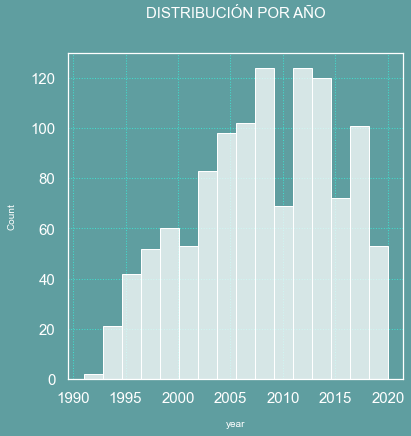

In [35]:
fig, ax = plotter.default_values(title='DISTRIBUCIÓN POR AÑO')
plotter.visualizar(kind='hist', x='year', df=eda, ax=ax)
plotter.guardar_figura(fig, 'distribucion_anyos', ruta)

Estudiando la columna de género se ha encontrado que hay unas entradas mal definidas("Sci=Fi"), con lo que se sustituyen los valores erróneos y se vuelve a calcular el agrupado géneros. 


In [36]:
organizador.sustitucion_valor_raro(eda, 'Sci=fi', 'Sci-Fi', columna='genres', dummie=True)
generos = organizador.agrupa_dummies(eda, 'genres')

/Users/juanbayonfernandez/THE_BRIDGE/Juan_Bayon/EDA/EDA/scr/utils/mining_data_tb.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].str.replace(valor, valor_sustitucion, regex=False)


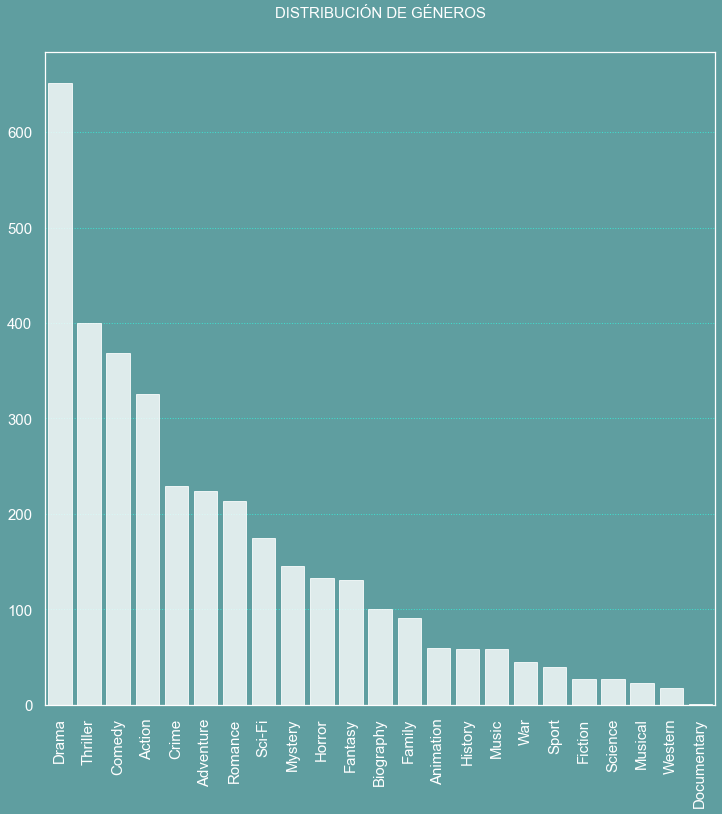

In [37]:
fig, ax = plotter.default_values(title='DISTRIBUCIÓN DE GÉNEROS', rotation=90, figsize=(12, 12))
plotter.visualizar(kind='bar', x=generos.index, y=generos.values, ax=ax)
plotter.guardar_figura(fig, 'distribucion_generos', ruta)

Hay todo tipo de géneros, y los que tienen más representación son los más habituales, se considera por tanto una muestra representativa del mercado cinematográfico. 

Se comparan ahora las tres fuentes de valoraciones que tiene la muestra, TMDb, IMDb y Metacritic para asegurar que tienen una distribución similiar, y que por tanto la muestra de IMDb objeto de este estudio es representativa.

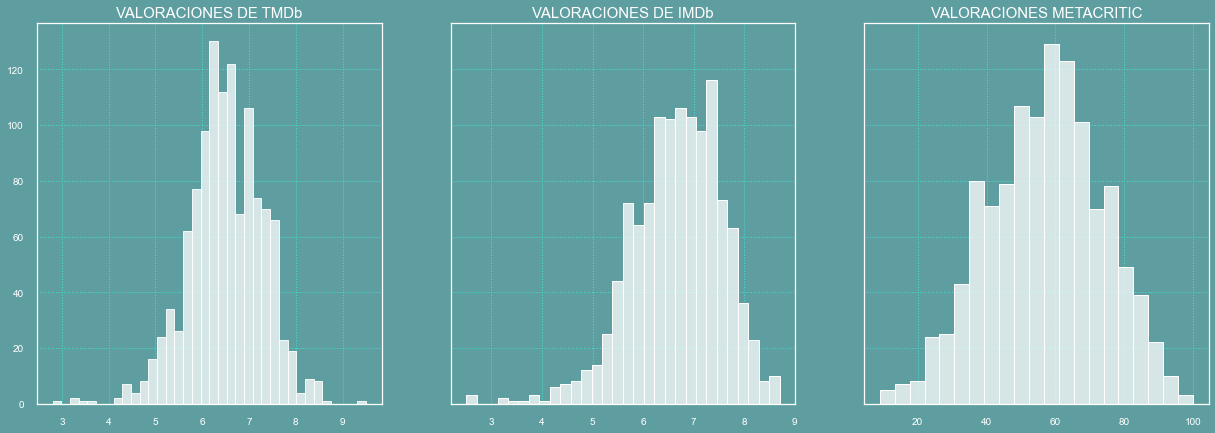

In [38]:
titulos = ['VALORACIONES DE TMDb', 'VALORACIONES DE IMDb', 'VALORACIONES METACRITIC']
xlabels = [None] * 3
ylabels = [None] * 3
valoresx = [eda.tmdb_ratings, eda.imdb_ratings, eda.metascore]
tipos = ['hist'] * 3

fig, ax = plotter.subplots(1, 3, titulos, sharey=True)
plotter.visualizacion_multiple(tipos=tipos, ax=ax, valoresx=valoresx, xlabels=xlabels, ylabels=ylabels)
plotter.guardar_figura(fig, 'valoraciones_3fuentes', ruta)

Las valoraciones de Metacritic tienen la escala del 0 a 100, no del 1 al 10, por lo que la muestra está ligeramente más abierta, pero la distribución es normal en las tres, bastante centrada y simétrica.

Como se observó anteriormente al estudiar los outliers, la muestra de Metacritic al ser un agregado del resto de páginas está más centrada y más simétrica y la muestra de IMDb es la más asimétrica y desplazada a la derecha, lo que significa que tiene valoraciones más altas en media. Son diferenciaciones de un punto, ya que IMDB se centra en el 7 y las otra dos en el 6. Se comprobará más adelante si está diferenciación supone alguna diferencia sobre el resultado del estudio. 

Sí que se aprecia ligeramente más descentrada hacia la derecha la muestra de IMDb, lo que significa que tiene unas valoraciones ligeramente más altas, pero esa diferencia no parece significativa muy significativa.

Se estudian a continuación los países recogidos en la muestra. 

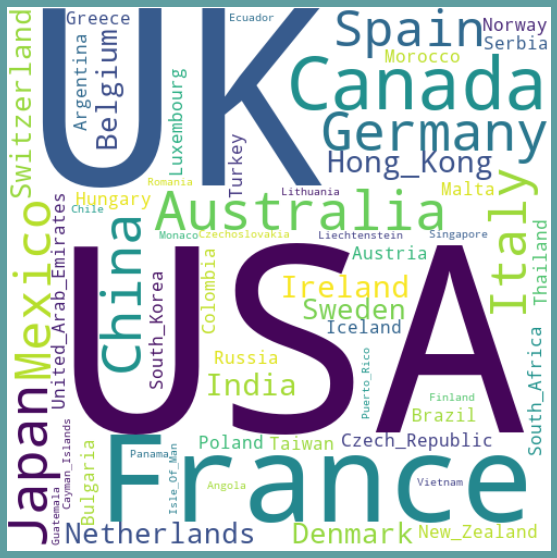

In [39]:
fig = plotter.wordcloud(paises.index)
plotter.guardar_figura(fig, 'importancia_paises', ruta)

In [40]:
eda['original_language']

0       en
3       en
4       en
5       ru
10      ru
        ..
2635    en
2639    en
2641    en
2645    en
2653    en
Name: original_language, Length: 1176, dtype: object

In [41]:
organizador.consulta_valor_concreto(eda, 'original_language', 'en')

En la muestra hay 1135 entradas con el valor en


Una muestra con variedad de países, con clara predominancia de EEUU y Reino Unido, ya que el mercado cinematográfico está dominado por la industria angloparlante. 

De hecho si se comprueba el idioma orignal una mayoría casi total tienen el inglés como lengua de base. Las conclusiones que se sacarán con esta muestra serán para la representación de este mercado mayoritario. 


Con respecto a las variables principales del estudio, y tal y como se comprobó anteriormente, tanto el presupuesto como las recaudaciones en EEUU y mundial cubren todo el espectro con valores altos y bajos.

Esto es importante para que la muestra sea válida para el próposito del estudio. 

Las variables cualitativas del estudio restantes se han mantendio a modo de control para comprobar si el director o los actores tienen repercusión tanto en las valoraciones como en las recaudaciones. 

Se estudian ahora los grupos de control de la muestra para comprobar si existen diferencias entre ellos en la distribución de las valoraciones: por edad, por género, por edad dentro de cada género y por procedencia (de EEUU o del resto).

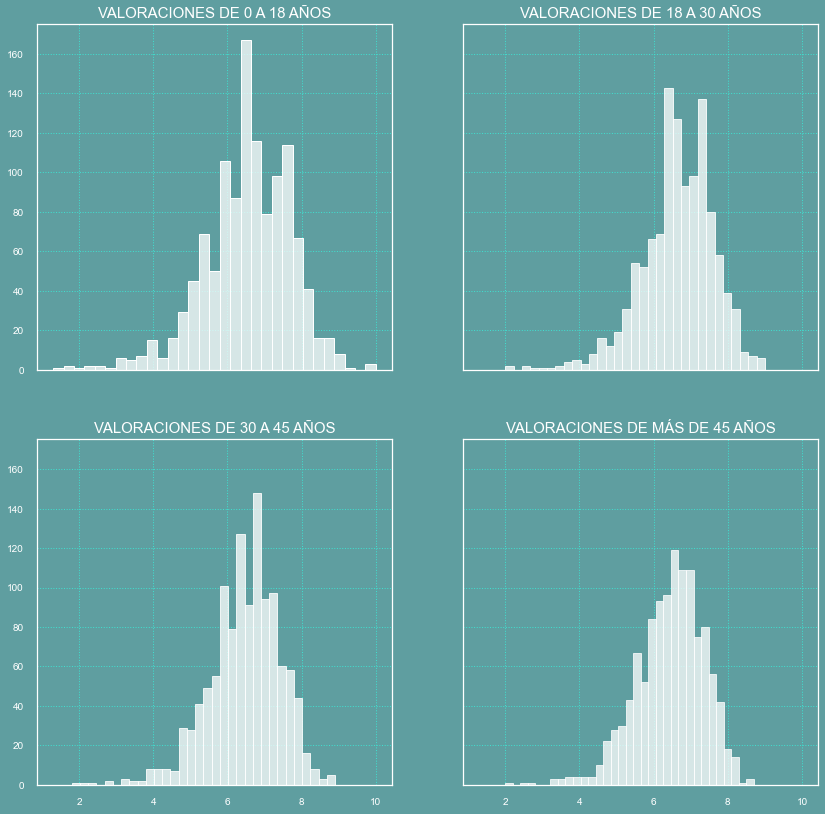

In [42]:
titulos = [['VALORACIONES DE 0 A 18 AÑOS', 'VALORACIONES DE 18 A 30 AÑOS'], ['VALORACIONES DE 30 A 45 AÑOS', 'VALORACIONES DE MÁS DE 45 AÑOS']]
xlabels = [[None]*2] * 2
ylabels = [[None]*2] * 2
valoresy = [[None]*3] * 2
valoresx = [['allgenders_0age_avg_vote', 'allgenders_18age_avg_vote'], ['allgenders_30age_avg_vote', 'allgenders_45age_avg_vote']]
tipos = [['hist']*2] * 2

fig, ax = plotter.subplots(2, 2, titulos=titulos, sharey=True, sharex=True)
plotter.visualizacion_multiple(tipos=tipos, ax=ax, valoresx=valoresx, valoresy=valoresy, df=eda, xlabels=xlabels, ylabels=ylabels)
plotter.guardar_figura(fig, 'valoraciones_edad', ruta)

La distribución de las valoraciones son prácticamente iguales para todos los tramos de edad, normales, centradas entre el 6 y el 7 (más en hacia el 7), ligeramente asimétrico hacia la derecha. De esta comparativa se saca que la edad no parece afectar a las valoraciones. 

Se sigue con la comparación entre sexos y combinando las dos variables para ver si la conclusión se mantiene. 

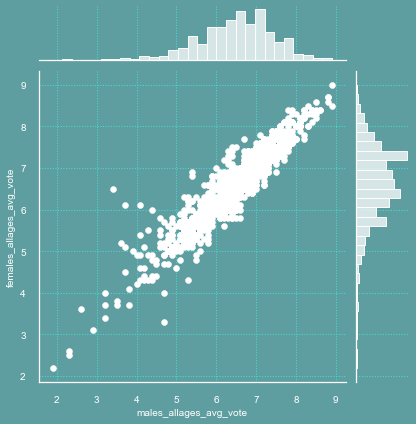

In [43]:
external_xlabel = 'males_allages_avg_vote'
external_ylabel = 'females_allages_avg_vote'
fig = plotter.visualizar(kind='joint', x='males_allages_avg_vote', y='females_allages_avg_vote', df=eda, external_xlabel=external_xlabel, external_ylabel=external_ylabel)
plotter.guardar_figura(fig, 'distribucion_genero', ruta)

Los votos entre los dos sexos están altísimamente relacionados, lo que significa que la variable sexo tampoco parece afectar a los resultados. 

Se procede a estudiar las dos variables conjuntamente. 

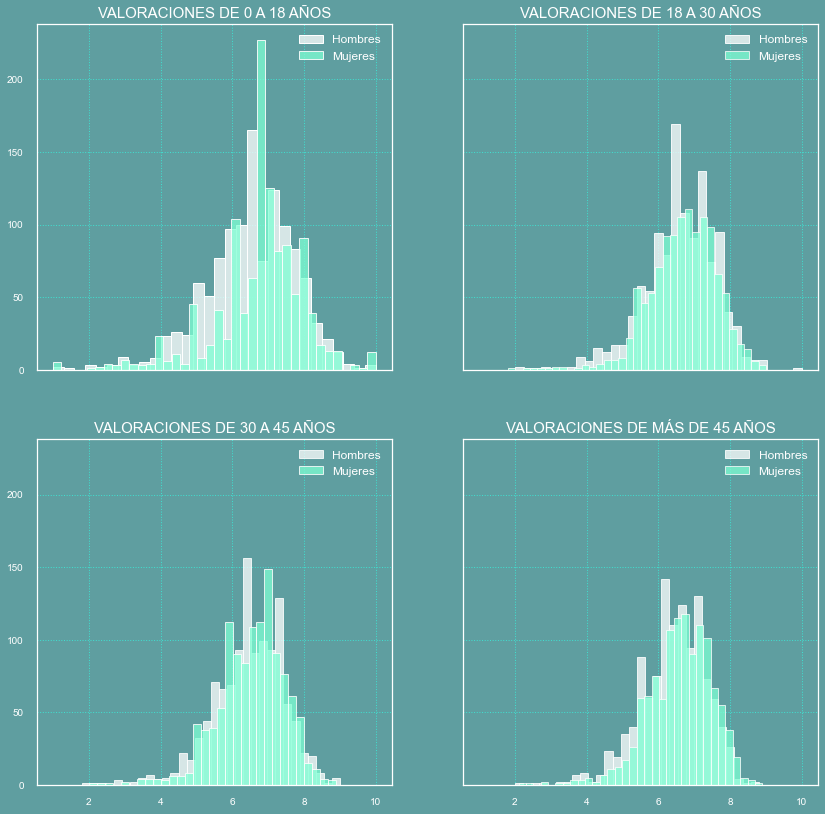

In [44]:
titulos = [['VALORACIONES DE 0 A 18 AÑOS', 'VALORACIONES DE 18 A 30 AÑOS'], ['VALORACIONES DE 30 A 45 AÑOS', 'VALORACIONES DE MÁS DE 45 AÑOS']]
valoresx1 = [['males_0age_avg_vote', 'males_18age_avg_vote'], ['males_30age_avg_vote', 'males_45age_avg_vote']]
valoresx2 = [['females_0age_avg_vote', 'females_18age_avg_vote'], ['females_30age_avg_vote', 'females_45age_avg_vote']]
valoresy = [[None]*3] * 2
tipos = [['hist']*2] * 2
xlabels = [[None]*2] * 2
ylabels = [[None]*2] * 2

fig, ax = plotter.subplots(2, 2, titulos, sharey=True, sharex=True)
plotter.visualizacion_multiple(tipos=tipos, ax=ax, valoresx=valoresx1, df=eda, valoresy=valoresy, xlabels=xlabels, ylabels=ylabels, label='Hombres')
plotter.visualizacion_multiple(tipos=tipos, ax=ax, valoresx=valoresx2, df=eda, valoresy=valoresy, color='aquamarine', xlabels=xlabels, ylabels=ylabels, label='Mujeres')
plotter.guardar_figura(fig, 'valoraciones_edad_genero', ruta)

Se puede comprobar que la la distribución es muy similar, por lo tanto el sexo y la edad no afectan a la distribución de las valoraciones y no hay que tenerlo en cuenta para la comprobación de la hipótesis del estudio.

Se comprueba también la relación existente entre los votantes de EEUU y del resto para comprobar que su afecta al resultado del estudio. 

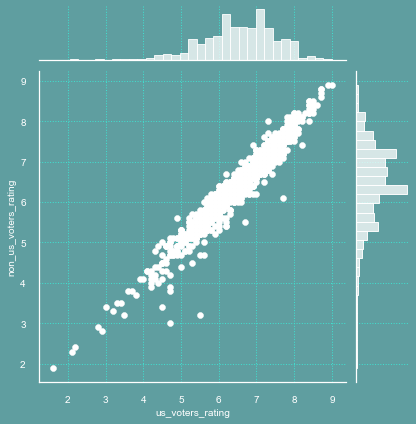

In [45]:
external_xlabel = 'us_voters_rating'
external_ylabel = 'non_us_voters_rating'
fig = plotter.visualizar(kind='joint', x='us_voters_rating', y='non_us_voters_rating', df=eda, external_xlabel=external_xlabel, external_ylabel=external_ylabel)
plotter.guardar_figura(fig, 'distribucion_procedencia', ruta)

Se observa una clarísima correlación por lo que se puede concluir que la procedencia no afecta a las valoraciones. 

Se busca ahora comprobar si hay alguna relación entre la cantidad de votos y las valoraciones. 

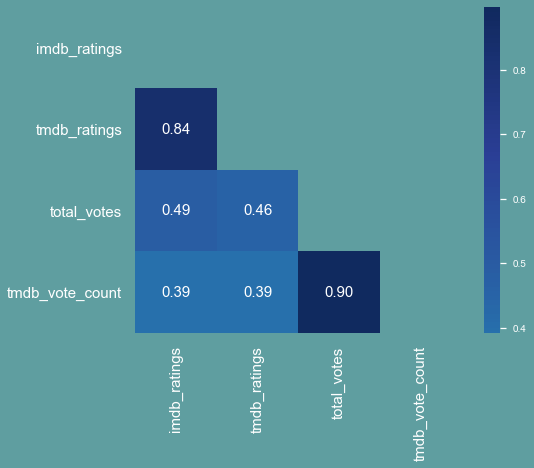

In [46]:
votos_cantidad = organizador.agrupa_columnas(eda, 'imdb_ratings', 'tmdb_ratings', 'total_votes', 'tmdb_vote_count', separadas=True)

fig = plotter.heatmap(votos_cantidad, figsize=(8, 6), rotation=90)
plotter.guardar_figura(fig, 'correlacion_votos_cantidad', ruta)

Apunta una cierta correlación pero no concluyente. Las notas más altas pueden tener una tendencia a tener valores más altos pero no se puede afirmar que a más votos mejores valoraciones, de todas formas se incluira esta variable al final para comprobar si afecta a las recaudaciones totales. La correlación que se observa es la cantidad de votos en las diferentes plataformas, lo que es el resultado esperable si los datos no están sesgados. 

Se estudia ahora el impacto del presupuesto sobre los votos.

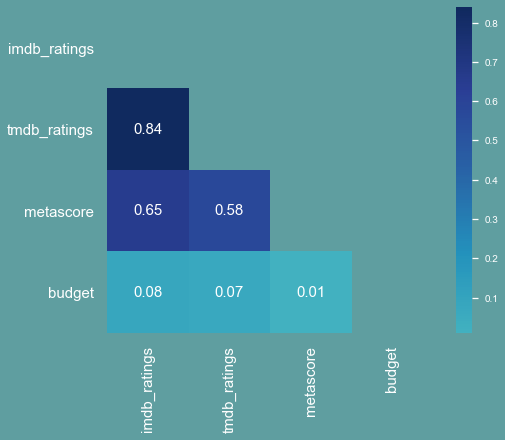

In [47]:
presupuesto_votos = organizador.agrupa_columnas(eda, 'imdb_ratings', 'tmdb_ratings', 'metascore', 'budget', separadas=True)

fig = plotter.heatmap(presupuesto_votos, figsize=(8, 6), rotation=90)
plotter.guardar_figura(fig, 'correlacion_presupuesto_votos', ruta)

La correlación es inexistente, de forma que el presupuesto no tiene ninguna repercusión sobre la valoraciones. 

Se busca ahora comprobar si el director o los actores repercuten en la relación de las valoraciones con el presupuesto.

Para el cálculo de los agrupados se usa el método de la calculadora estadística correspondiente. 

In [48]:
corr_directores = calculadora.agrupado_ganancias('director_name', valoracion=True, conteo=True)

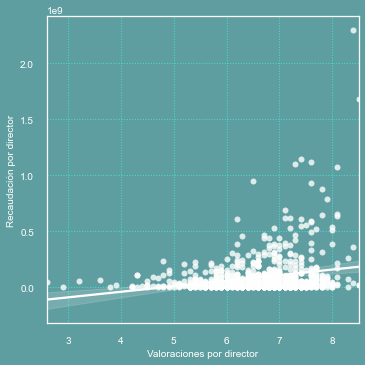

In [49]:
external_xlabel = 'Valoraciones por director'
external_ylabel = 'Recaudación por director'
fig = plotter.visualizar(kind='lm', x='imdb_mean_vote', y='worlwide_gross_income', df=corr_directores, external_xlabel=external_xlabel, external_ylabel=external_ylabel)
plotter.guardar_figura(fig, 'agrupado_director', ruta)

`corr_actores = calculadora.agrupado_ganancias('actors', valoracion=True, conteo=True, dummie=True)`

La generación de este dataframe requiere algo de tiempo para su procesamiento. Se guarda y se carga para su uso sin necesidad de ejecutar la celda.

`gestor.guardar_csv(corr_actores, ruta, 'corr_actores.csv')`

In [50]:
corr_actores = gestor.cargar_df(ruta + os.sep + 'data' + os.sep + 'corr_actores.csv')

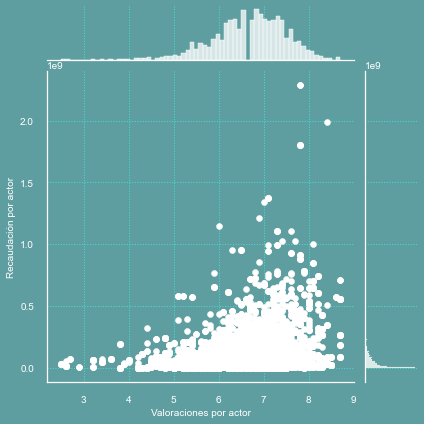

In [51]:
external_xlabel = 'Valoraciones por actor'
external_ylabel = 'Recaudación por actor'
fig = plotter.visualizar(kind='joint', x='imdb_mean_vote', y='worlwide_gross_income', df=corr_actores, external_xlabel=external_xlabel, external_ylabel=external_ylabel)
plotter.guardar_figura(fig, 'agrupado_actor', ruta)

Se compureba que ninguna de las variables cualitativas da como resultado una relación entre las valoraciones y el presupuesto. 

## RESUMEN DEL ANÁLISIS DE LA MUESTRA

A modo de resumen y después del análisis de los datos contenidos en el dataset hasta el momento, se puede concluir que **la muestra es variada y suficiente** respecto a géneros, años (aunque están sobre todo recogidos valores a partir de 1990 que es cuando surgió la web de IMDb), países o presupuestos. 

Los ingresos totales también recogen toda la horquilla de valores, que es necesario para el estudio. **Es una muestra eminentemente en inglés y con una mayoría de EEUU como representación del mercado filmográfico**. 

Después de comprobar los datos separados por género, edad o procedencia, al no afectar a las avloraciones, se puede afirmar que **el valor medio de las valoraciones datos de las valoraciones medias representan bien al conjunto de votantes**, dado que además la muestra está muy centrada. 

**Existen tres páginas de las que tenemos las valoraciones y son muy simlares entre sí**, aunque la de IMDb que es la central del estudio se desplaza ligeramente hacia la derecha respecto a las otras dos. 

Se estudia además la repercusión del resto de variables que se introducen en el estudio. **Se concluye de los datos que el presupuesto, cantidad de votos, géneros, actores o director no afectan tampoco a las votaciones**. 
 


#### Por tanto dado que las votaciones de IMDb son similares al resto de valoraciones y no se ven afectadas por el resto de variables, se procede a comprobar si existe relación con el presupuesto.

Se dibuja la matriz de correlación entre las diferentes variables principales del estudio para determinar las conclusiones finales.

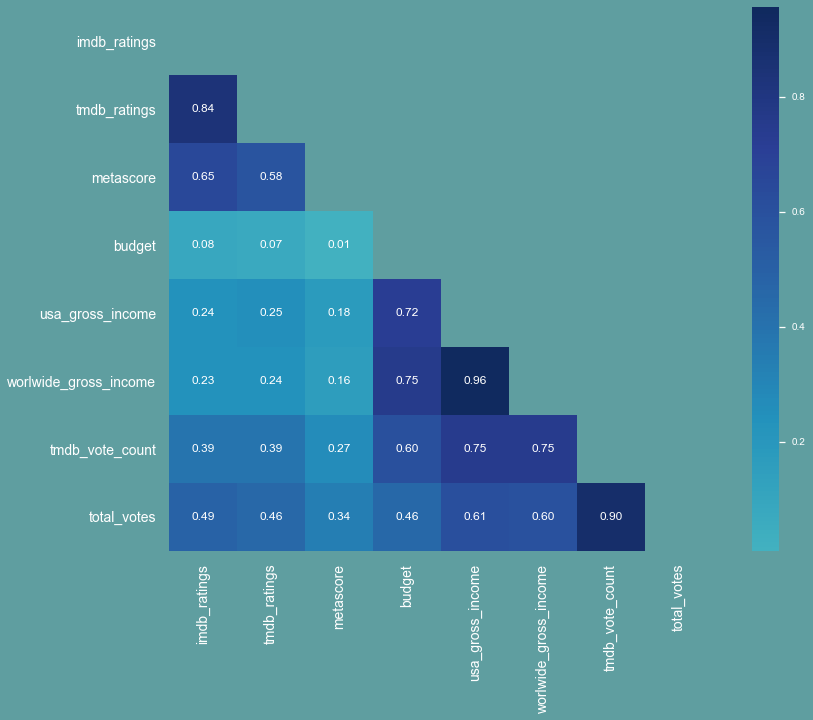

In [52]:
conclusiones = organizador.agrupa_columnas(eda, 'imdb_ratings', 'tmdb_ratings', 'metascore', 'budget','usa_gross_income', 'worlwide_gross_income','tmdb_vote_count', 'total_votes', separadas=True)

fig = plotter.heatmap(conclusiones, rotation=90, text_size=14, annot_size=12)
plotter.guardar_figura(fig, 'correlacion_conclusiones', ruta)

- Hay una clara corrrelación entre las tres fuentes de votos: imdb, tmdb y metacritic, por lo que parece que la fuente de imdb es lo suficientemente fiable. El hecho de que estuviese más desplazada hacia la derecha no afecta a los resultados. 

- Hay correlación entre la cantidad de votos y la recaudación sin embargo con las valoraciones es practicamente nula. Es decir, en global lo que afecta a la recaudación es la cantidad de votos que han recibido, pero no una buena o mala crítica.

- Respecto al presupuesto se puede afirmar que tiene relación con los ingresos recibidos (se entiende que es por la repercusión de la publicidad). Sin embargo no se puede concluir que afecten al número de críticas recibidas. El presupuesto y las valoraciones, al igual que la recaudación, no tinen ningún tipo de correlación.





# CONCLUSIONES

#### La respuesta a la pregunta objeto del análisis es que para la muestra analizada **las valoraciones de imdb no afectan a la recaudación totales de las películas.** 

Además se pueden añadir los siguientes puntos:

- **El factor relacionado con la recaudación es el presupuesto**, posiblemente porque a mayor presupuesto mayor publicidad. Sin embargo el presupuesto aunque tiene una ligera relación con las votaciones no se puede concluir con que afecte a las mismas.

- **Existe una relación entre la cantidad de votos y la recaudación.**

- **Las notas de las diferentes páginas están totalmente correlacionadas**, por lo se entiende que la muestra es representativa. 

- El resto de variables utilizadas en el estudio (**género, edad, procedencia del votante, director, actores o género) no tienen repercusión sobre las valoraciones** y por tanto las conclusiones detallada se entienden como válidas para la muestra de estudio.

- La muestra de estudio se considera variada y suficiente y representa los casos más comunes del mercado, con predominancia de películas de eeuu en inglés. Los datos mayoritarios son a partir de 1990 que es cuando se funda imdb.

## RECURSOS DISPONIBLES

Conjuntamente con el desarrollo de este estudio se pone a disposición el material del mismo para uso público: 

- Streamlit. A ejecutar a continuación.
- API con el dataset utilizado: http://localhost:8008/get_data?eltoken=Q76903092

In [ ]:
app_path = ruta + os.sep + 'scr' + os.sep + 'dashboard' + os.sep + 'app.py'
print(app_path)

!streamlit run "PARA IR A STREAMLIT COPIA EL PATH SUPERIOR AQUÍ Y EJECUTA LA CELDA"

# DESARROLO DE CUESTIONES PARTICULARES

Una vez que se ha desarrollado el proyecto con sus conclusiones, se hacen unos análisis extra y se da respuesta a unas cuestiones particulares. 

1. Was it possible to demonstrate the hypothesis? Why?

2. What can you conclude about your data study?

3. What would you change if you need to do another EDA project?

4. What do you learn doing this project?

5. Are there outliers or some rare data?

6. What are the columns that have more repeated values?

7. Show the histogram of each column of your dataset with bins=5. How are the ranges painted?

8. Which are the columns with the highest correlation? Draw the correlation matrix.

9. Determine and explain if the data is cleaned. If not, then clean it. Show different tendencies for each column in your dataset. Show five graphs in which you can conclude your hypothesis

10. Represent, in a pie chart, the time you have needed for each point in the The project steps section.



### PUNTO 1

Fue posible llegar a una conclusión final, pero refutando la hipóstesis de partida. Primero se estudiaron los datos y todas las variables que podían influir en las valoraciones para posteriormente una vez que se determina que las variables no afectan, se estudida la existencia de esa correlación, dando un resultado negativo. Con el dataset actual se puede afirmar que las valoraciones de IMDb (y de las otras fuentes tampoco) no afectan a la recaudación total de las películas. 

### PUNTO 2

Las valoraciones no afectan a la recaudación tal y como se explica en el apartado anterior pero el presupuesto sí que lo hace. Además hay una cierta relación entre la cantidad de votos de una película y su recaudación, aunque no sea determinante. 

### PUNTO 3

Cambiaría el planteamiento del proyecto en su inicio, porque tuve que rehacerlo ligeramente. En un principio hice un análisis muy exhaustivo de las columnas, que no me reportó demasiados datos ni conclusiones. De forma que me parece mejor planteamiento optimizar las consultas para hacerme una idea clara desde el primero momento. 

En la fase de limpieza también haría un repaso desde el primer momento de todos los valores raros que porque en este caso me han dado error posteriormente y he tenido que volver atrás para tratarlos. 

### PUNTO 4

Aprendí en primer lugar cómo se estructura un proyecto EDA y los pasos que hay que seguir. La intención de generar un documento lo más científico posible y que sirva para comunicar. Además aprendí herramientas específicas como Streamlit o Flask. 

### PUNTO 5

Outiliers definidos como los valores por encima y por debajo del 1.5 de los cuartiles superiores e inferiores sí, evidentemente. Pero para este estudio en concreto, como se detallaba en el apartado correspondiente, no se han considerado como tal, al ser importante incluir todo el abanico de posibilidades tanto en las valoraciones como en las recaudaciones y cantidad de votos. 

Datos raros sí que había. En las columnas de presupuesto y de recaudaciones había divisas diferente que hubo que convertir. En la columna film había 5 valores extaños, con una entrada múltiple que no correspondía. En la columna año también había unos valores extraños con texto y número. Había además varias columnas con tipos que no correspondían, y tres con valores múltiples que fue necesario limpiar. 

### PUNTO 6

In [53]:
calculadora.valores_unicos_columnas()

La columna director_name tiene 821 valores no repetidos
La columna genres tiene 447 valores no repetidos
La columna film tiene 1237 valores no repetidos
La columna tmdb_ratings tiene 51 valores no repetidos
La columna original_language tiene 16 valores no repetidos
La columna tmdb_vote_count tiene 1020 valores no repetidos
La columna year tiene 48 valores no repetidos
La columna country tiene 260 valores no repetidos
La columna actors tiene 1237 valores no repetidos
La columna budget tiene 224 valores no repetidos
La columna usa_gross_income tiene 1237 valores no repetidos
La columna worlwide_gross_income tiene 1237 valores no repetidos
La columna metascore tiene 85 valores no repetidos
La columna total_votes tiene 1232 valores no repetidos
La columna imdb_ratings tiene 55 valores no repetidos
La columna allgenders_0age_avg_vote tiene 71 valores no repetidos
La columna allgenders_18age_avg_vote tiene 62 valores no repetidos
La columna allgenders_30age_avg_vote tiene 60 valores no repet

La columna que mas valores repetidos tien es la del idioma original, ya que tiene sólo 16 valores únicos. Después vendrían los años, y todas las columnas de votaciones, que tienen también un número más reducido de entradas diferentes. 

### PUNTO 7

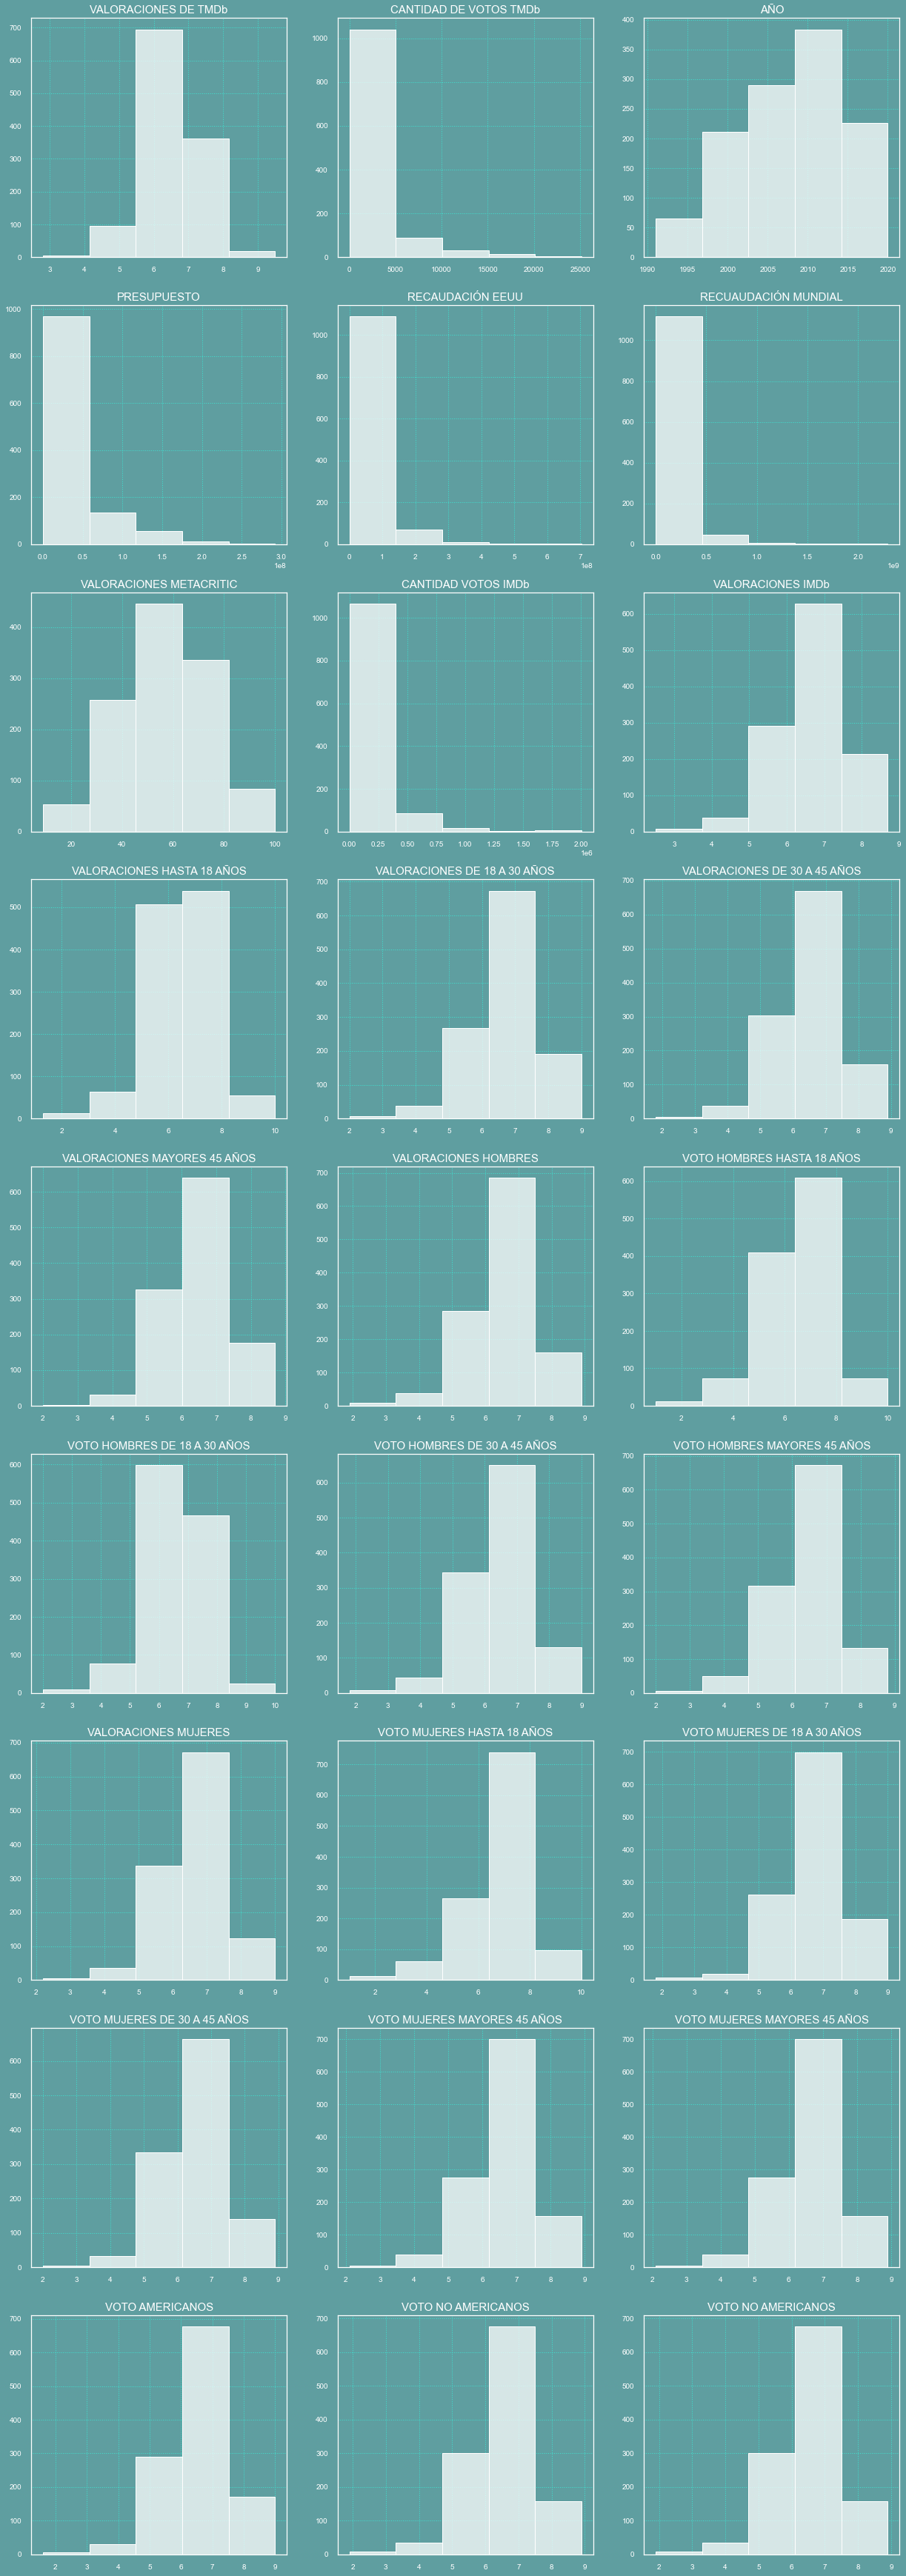

In [54]:
fig = plotter.allcolumns_hist_bin5(eda)
plotter.guardar_figura(fig, 'columnas_bin5', ruta)

Se han representado sólo las columnas númericas, dado que las variables no cuantitativas no se pueden agrupar de manera continua. Los intervalos representados dependen de la amplitud entre los valores máximos y mínimos, dividiendo esa amplitud entre 5. En este caso como la mayoría son valoraciones del 1 al 10, son intervalos de 2 en 2. Sin embargo la cantidad de votos va de 5.000 en 5.000 votos. 

### RESPUESTA 8

Se ha dibujado anteriormente una matriz de correlación pero para los valores del estudio. La mayor correlación es entre las votaciones de las diferetes páginas, y justo después el presupuesto y la cantidad de votos con la recaudación. 

### RESPUESTA 9

En el desarrollo del proyecto se han ido contestando estas preguntas. Los datos no estaban limpio y se limpió para el análisis. Asimismo se han analizado la distribución de los datos de las diferentes columnas, con sus estadísticos con el método describe y gráficos explicativos de los mismos.

### RESPUESTA 10

La distribución de tiempo para el proyecto ha sido la siguiente: 

* 1.Encontrar el tema. 2 horas.

* 2.Encontrar los datos. 14 horas.

* 3.Definir la hipótesis. 1 hora. 

* 4.Definir los pasos necesarios para demostrar la hipótesis. 10 horas.
* 5.Ejecura los pasos con Python: 

    * a.Obtener los datos. 0 horas.

    * b.Limpiar los datos. 31 horas.

    * c.Dibujar los datos y sacar conclusiones. Hacer la API y la página de Stremlit. 57 horas
    
    * d.Explicación y conclusiones. 19 horas.

In [55]:
tiempos = {'Hipotesis': 3,'Tema': 5, 'Pasos': 10, 'Datos': 14, 'Limpiar': 31, 'Analizar y presentar': 57, 'Conclusion': 19}

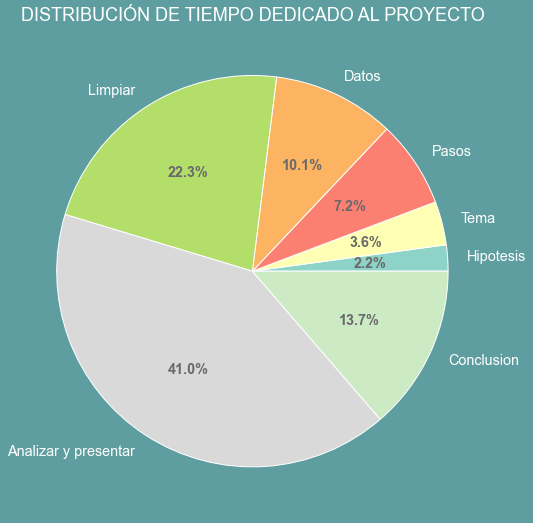

In [56]:
fig = plotter.pie_chart(pd.Series(tiempos), 'DISTRIBUCIÓN DE TIEMPO DEDICADO AL PROYECTO')
plotter.guardar_figura(fig, 'pie_chart', ruta)

### SE GUARDAN AHORA LOS DATOS PERSONALES EN EL FICHERO INFO.JSON

In [57]:
data = {}
data['project_name'] = 'Repercusion de las valoraciones de IMDb '
data['author'] = 'Juan Bayon'
data['linkedin'] = 'https://www.linkedin.com/in/juan-bayon-fernandez-554a75104/'
data['e_mail'] = 'xoan311@gmail.com'
data['project_title'] = 'Repercusion de las valoraciones de IMDb'
data['project_description'] = 'Como hipotesis principal se comprobara si las valoraciones que se hacen de las peliculas en IMDb estan directamente relacionadas con la recaudacion de las mismas. Ademas se plantean antes varias posibilidades de estudio segmentadas que permitiran comprobar que no se generalizan las conclusiones, estudiando las votaciones por sexo, edad o procedencia. Se comprobaran ademas otras variables como el pais de procedencia o el genero para asegurar que la muestra es lo suficientemente variada'
data['flask_port'] = 8008
data['streamlit_port'] = 8501
data['links'] = []
data['python_libraries_used'] = ['streamlit', 'json', 'argparse', 'pandas', 'PIL', 'os', 'sys', 'matplotlib', 'seaborn', 'numpy', 'wordcloud', 'flask']

In [58]:
full_paht = ruta + os.sep + 'info.json'
gestor.load_json(data, full_paht)

### SE GUARDA AHORA EL DATAFRAME COMO JSON PARA QUE ESTÉ DISPONIBLE PARA LA API FLASK

In [59]:
path = ruta + os.sep + 'scr' + os.sep + 'api' + os.sep + 'static' + os.sep + 'EDA_analisis.json'
eda_json = eda.to_json()
gestor.load_json(eda_json, path)